<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bayesian-estimation-equivalent-of-linear-mixed-model" data-toc-modified-id="Bayesian-estimation-equivalent-of-linear-mixed-model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bayesian estimation equivalent of linear mixed model</a></span><ul class="toc-item"><li><span><a href="#The-classic-linear-mixed-model" data-toc-modified-id="The-classic-linear-mixed-model-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>The classic linear mixed model</a></span></li></ul></li><li><span><a href="#Bayesian-inference" data-toc-modified-id="Bayesian-inference-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Bayesian inference</a></span></li><li><span><a href="#Steps-of-Bayesian-data-analysis" data-toc-modified-id="Steps-of-Bayesian-data-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Steps of Bayesian data analysis</a></span></li><li><span><a href="#Step-1---Identify-the-relevant-data-for-question-under-investigation" data-toc-modified-id="Step-1---Identify-the-relevant-data-for-question-under-investigation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Step 1 - Identify the relevant data for question under investigation</a></span><ul class="toc-item"><li><span><a href="#Data-cleaning-and-exploratory-data-analysis" data-toc-modified-id="Data-cleaning-and-exploratory-data-analysis-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Data cleaning and exploratory data analysis</a></span></li></ul></li><li><span><a href="#Step-2---Define-the-descriptive-statistical-model-\begin{align*}
y_{ij}-&amp;\sim-Normal(\beta_0-+-u_{1j}-+-x(\beta_1-+-u_{2j}),-\sigma)
\\-\beta_0-&amp;\sim-Normal(250,-50)
\\-\beta_1-&amp;\sim-Normal(0,-50)
\\-u_1-&amp;\sim-Normal(0,-\tau_{u1})
\\-u_2-&amp;\sim-Normal(0,-\tau_{u2})
\\-\tau_{u1}-&amp;\sim-halfNormal(0,-50)
\\-\tau_{u2}-&amp;\sim-halfNormal(0,-20)
\\-\sigma-&amp;\sim-halfNormal(0,-50)
\end{align*}" data-toc-modified-id="Step-2---Define-the-descriptive-statistical-model-\begin{align*}
y_{ij}-&amp;\sim-Normal(\beta_0-+-u_{1j}-+-x(\beta_1-+-u_{2j}),-\sigma)
\\-\beta_0-&amp;\sim-Normal(250,-50)
\\-\beta_1-&amp;\sim-Normal(0,-50)
\\-u_1-&amp;\sim-Normal(0,-\tau_{u1})
\\-u_2-&amp;\sim-Normal(0,-\tau_{u2})
\\-\tau_{u1}-&amp;\sim-halfNormal(0,-50)
\\-\tau_{u2}-&amp;\sim-halfNormal(0,-20)
\\-\sigma-&amp;\sim-halfNormal(0,-50)
\end{align*}-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Step 2 - Define the descriptive statistical model <div class="MathJax_Display" style="text-align: center;"></div><script type="math/tex; mode=display" id="MathJax-Element-51">\begin{align*}
y_{ij} &\sim Normal(\beta_0 + u_{1j} + x(\beta_1 + u_{2j}), \sigma)
\\ \beta_0 &\sim Normal(250, 50)
\\ \beta_1 &\sim Normal(0, 50)
\\ u_1 &\sim Normal(0, \tau_{u1})
\\ u_2 &\sim Normal(0, \tau_{u2})
\\ \tau_{u1} &\sim halfNormal(0, 50)
\\ \tau_{u2} &\sim halfNormal(0, 20)
\\ \sigma &\sim halfNormal(0, 50)
\end{align*}</script></a></span></li><li><span><a href="#Step-3---Specifying-priors-for-the-model" data-toc-modified-id="Step-3---Specifying-priors-for-the-model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Step 3 - Specifying priors for the model</a></span></li><li><span><a href="#Stan-model-of-varying-intercept-and-slope-linear-mixed-model" data-toc-modified-id="Stan-model-of-varying-intercept-and-slope-linear-mixed-model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Stan model of varying intercept and slope linear mixed model</a></span></li><li><span><a href="#Reporting-the-results-of-Bayesian-linear-mixed-model" data-toc-modified-id="Reporting-the-results-of-Bayesian-linear-mixed-model-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Reporting the results of Bayesian linear mixed model</a></span></li><li><span><a href="#Reporting-the-results-of-the-Bayesian-one-sample-t-test-equivalent" data-toc-modified-id="Reporting-the-results-of-the-Bayesian-one-sample-t-test-equivalent-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Reporting the results of the Bayesian one sample t-test equivalent</a></span><ul class="toc-item"><li><span><a href="#Write-up" data-toc-modified-id="Write-up-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span><font size="3">Write up</font></a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>References</a></span></li></ul></div>

In [1]:
# Import the neccesary python libraries for Bayesian analysis
# and data visualisation.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import stan as ps
import arviz as az
import statistics as Stats
import scipy.stats as stats
from patsy import dmatrix

# Importing nest_asyncio is only necessary to run pystan in Jupyter Notebooks.
import nest_asyncio
nest_asyncio.apply();

In [2]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

# Bayesian estimation equivalent of linear mixed model

## The classic linear mixed model

# Bayesian inference
<font size = "3"> Following the quick description of classic linear mixed model above its important to keep in mind that Bayesian analysis inference are all derived from the application of Bayes rule $P(\theta \mid y) = \large \frac{P(y \mid \theta) \, P(\theta)}{P(y)}$ and as such while the following description of the Bayesian model is an equivalent to a classic linear mixed model, it is fundamentally different, because its uses fully probabilistic modelling and therefore  the infernces are not based on sampling distributions</font>
    
<font size = "1"> For a fuller description see the practicing Bayesian statistics markdown file within the Github repository.</font>

# Steps of Bayesian data analysis

<font size = "3"> Kruschke (2015) offers a step by step formulation for how to conduct a Bayesian analysis:

1. Identify the relevant data for question under investigation.

2. Define the descriptive (mathematical) model for the data.

3. Specify the priors for the model. In the case of scientific research publication is the goal, as such the priors must be accepted by a skeptical audience. Much of this can be achieved using prior predictive checks to acsertain if the priors are reasonable.

4. Using Bayes rule estimate the posterior for the parameters of the model using the likelihood and priors. Then interpret the posterior

5. Conduct model checks. i.e. Posterior predictive checks.</font> 

<font size = "1">This notebook will follow this approach generally.</font> 

#  Step 1 - Identify the relevant data for question under investigation

Within this notebook the example linear mixed model anlysis will be conducted on a peadagogically standard in statistics education literature, commonly refered to as the "sleep study" data set from the LME4 package (Bates, Mächler, Bolker, & Walker 2014) taken from Belenky et al. (2003).

The "sleep study" dataset consists of repeated observations from 18 participants of their average reaction time (in ms) across 10 days of testing. Baseline scores on day 0 consisted of the reactions times scores for each participant before sleep deprivation began. For the following 9 days sleep was resticted to 3 hours.

## Data cleaning and exploratory data analysis

In [3]:
url = 'https://raw.githubusercontent.com/ebrlab/Statistical-methods-for-research-workers-bayes-for-psychologists-and-neuroscientists/master/wip/Data/Sleepstudy_data'
#Import data .csv file into pandas dataframe.
df = pd.read_csv(url)

In [4]:
# Convert to long to change the particapnt ids to 1:18 for use in Stan which indexes start at 1.
df_wide = df.pivot_table(index = 'Subject', columns = 'Days', values = 'Reaction').reset_index()
df_wide['Subject'] = list(range(1, len(df_wide)+1))

In [5]:
df_long = pd.melt(df_wide, id_vars=['Subject'], value_vars = range(0,10),
        var_name='Day', value_name='Reaction')
df_long['Day'] = df_long['Day'].astype(int)
df_long.head()

,Subject,Day,Reaction
0,1,0,249.5600
1,2,0,222.7339
2,3,0,199.0539
3,4,0,321.5426
4,5,0,287.6079


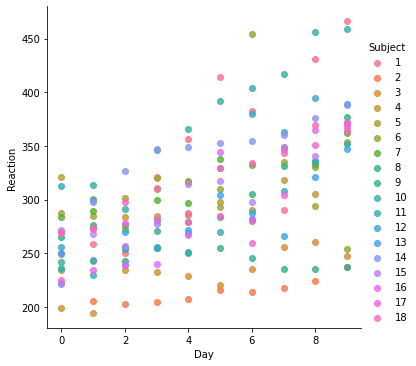

In [6]:
sns.lmplot(x = 'Day', y = 'Reaction', data=df_long, hue = 'Subject', fit_reg = False);

In case such as the one with this dataset with few subject but multiple observation veiwing the data toghether can provide useful insight. What the plot seems to show is that generally reaction times increased as the number of sleep deprived days increased but that there was variability between the subjects in terms hoe much their reaction times decreased.

# Step 2 - Define the descriptive statistical model \begin{align*}
y_{ij} &\sim Normal(\beta_0 + u_{1j} + x(\beta_1 + u_{2j}), \sigma)
\\ \beta_0 &\sim Normal(250, 50)
\\ \beta_1 &\sim Normal(0, 50)
\\ u_1 &\sim Normal(0, \tau_{u1})
\\ u_2 &\sim Normal(0, \tau_{u2})
\\ \tau_{u1} &\sim halfNormal(0, 50)
\\ \tau_{u2} &\sim halfNormal(0, 20)
\\ \sigma &\sim halfNormal(0, 50)
\end{align*} 

# Step 3 - Specifying priors for the model

# Stan model of varying intercept and slope linear mixed model

In [7]:
Linear_mixed_model = """

data {

  int<lower=1> N; // number of data observed
  int<lower=1> J; // number of subjects
  int<lower=1> K;
  vector[N] y; // obsevered data
  vector[N] x; // predictor
  int<lower = 0, upper=J> subj_id[N];
  
  // Run likelihood for posterior predictive or not for prior predictive checks
  int<lower= 0, upper = 1> onlyprior;
  
  // Prior values
  real beta_1mu;
  real beta_1sigma;
  real beta_2mu;
  real beta_2sigma;
  real sigma_sigma;
  real sigma_u1_sigma;
  real sigma_u2_sigma;
}

parameters {
// Fixed effects parameter 
vector[K] beta;
// random intercept parameters
vector[J] u_1;
// random slope parameter
vector[J] u_2;

// residual error
real<lower = 0> sigma;

// Population distribution for the subject variability 
// for intercept and slope terms
vector<lower=0>[2] sigma_u;


}

transformed parameters{
vector[N] mu;

mu = beta[1] + u_1[subj_id] + x .* (beta[2] + u_2[subj_id]) ;
    
}

model {

// Priors
beta[1] ~ normal(beta_1mu, beta_1sigma);
beta[2] ~ normal(beta_2mu,beta_2sigma);
sigma ~  normal(0, sigma_sigma);
sigma_u[1] ~ normal(0, sigma_u1_sigma);
sigma_u[2] ~ normal(0, sigma_u2_sigma);
u_1 ~ normal(0, sigma_u[1]);
u_2 ~ normal(0, sigma_u[2]);

if (!onlyprior)
//likelihood
y ~ normal(mu, sigma);

}

generated quantities{
real yrep[N];
vector[N] log_lik;

yrep = normal_rng(mu, sigma);
for (i in 1:N) {
    log_lik[i] = normal_lpdf(y[i] | mu[i], sigma);
  }
    
}

"""

In [8]:
X = df_long['Day'].values
data = {'N': len(df),
        'y': df_long.Reaction.values,
        'K': 2,
        'x': X,
        'J': df_long.Subject.nunique(),
        'subj_id': df_long.Subject.values,
        
        # Set to one for prior predictive checks
        'onlyprior': 0,
        'beta_1mu': 250.,
        'beta_1sigma': 5.,
        'beta_2mu': 0.0,
        'beta_2sigma': 5.,
        'sigma_sigma': 10.,
        'sigma_u1_sigma': 10.,
        'sigma_u2_sigma': 10.}

In [9]:
sm = ps.build(Linear_mixed_model, data = data)

Building...



Building: found in cache, done.Messages from stanc:


In [10]:
fit = sm.sample(num_chains = 4);

Sampling:   0%
Sampling:   0% (1/8000)
Sampling:   0% (2/8000)
Sampling:   0% (3/8000)
Sampling:   0% (4/8000)
Sampling:   1% (103/8000)
Sampling:   8% (602/8000)
Sampling:  18% (1402/8000)
Sampling:  43% (3401/8000)
Sampling:  61% (4901/8000)
Sampling:  86% (6900/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 0.000173 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.73 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/httpstan_l1v2pokd/model_incyyci6.stan', line 58, column 0 to column 28)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either

In [11]:
# Put fit ouptuts into pandas dataframe.
fit_df = fit.to_frame()

In [12]:
# Number of divergent transitions.
sum(fit_df['divergent__'] > 0)

0

In [13]:
summ = az.summary(fit, var_names = ['beta', 'sigma', 'sigma_u'])
summ

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta[0],250.975,3.925,243.285,257.852,0.054,0.039,5183.0,3076.0,1.0
beta[1],9.501,1.610,6.471,12.473,0.041,0.029,1553.0,2009.0,1.0
sigma,25.449,1.459,22.920,28.298,0.021,0.015,5103.0,3161.0,1.0
sigma_u[0],20.726,4.032,13.296,28.302,0.069,0.049,3368.0,3134.0,1.0
sigma_u[1],6.557,1.399,4.374,9.297,0.022,0.016,4548.0,3067.0,1.0


# Posterior predictive checks

# Maximum aposterior estimate (MAP) for the linear mixed model

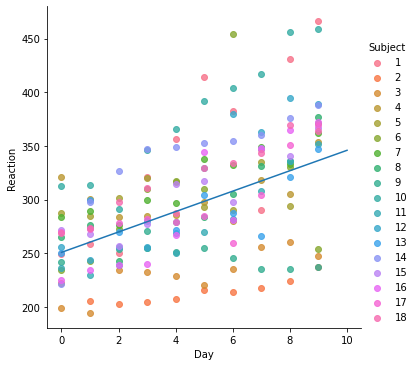

In [14]:
x_vals = np.linspace(0,10,100)
y_vals = np.mean(fit_df['beta.1']) + np.mean(fit_df['beta.2']) * (x_vals)
sns.lmplot(x = 'Day', y = 'Reaction', data=df_long, hue = 'Subject', fit_reg = False);
plt.plot(x_vals, y_vals, '-');

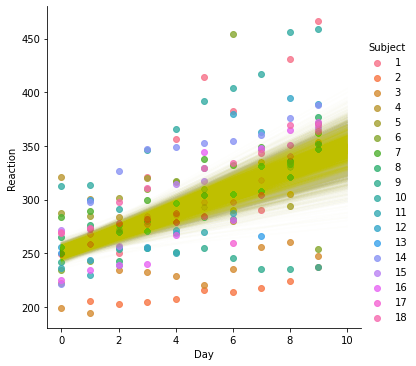

In [57]:
sns.lmplot(x = 'Day', y = 'Reaction', data=df_long, hue = 'Subject', fit_reg = False);

for i in range(0, 3999):
    # Mean centred
    y_vals = fit_df['beta.1'][i] + (fit_df['beta.2'][i] * x_vals)
    plt.plot(x_vals, y_vals, '-y', alpha=0.01)

In [16]:
#Convert pystan fit object to IO for Arviz functions.
# Convert pystan fit object to IO for Arviz functions.
idata = az.from_pystan(posterior=fit, posterior_model=sm, log_likelihood = 'log_lik', posterior_predictive=['yrep'],observed_data= 'y')

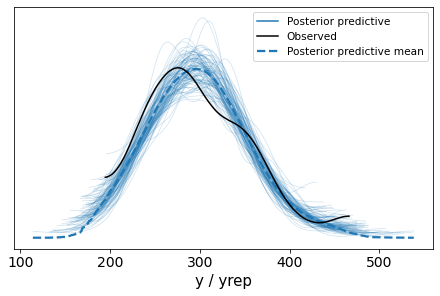

In [17]:
# Plot posterior simulated data sets for posterior predictive check
az.plot_ppc(idata, data_pairs= {"y" : "yrep"}, num_pp_samples= 100);

# Reporting the results of Bayesian linear mixed model

<font size = "3">As Kruschke correctly points out there is no standard formula or presentation method for the results of a Bayesian data analyis like the APA guide for reporting frequentist analysis. It is likely there never will be, because as McElreath (2020) explains, Bayesian data analysis is more like a engineering approach to the problem and the resulting model that is fit will be analysis specific. In addition, as Gabry et al, (2019) have argued visualisations maybe even more key, so all the visualtions above would have to be included with any write up. Anyway, the write up below generally follows the advice of Kruschke (2015) chapter 25. In any application though it comes down to the problem to be described and the audience that needs to be convinced. </p><br/>

<h2>Write up</h2><br/>

# Can we do better - modelling reaction times using lognormal likelihood

The modelling of reaction times has generated many methodological and statistical discussions (Lachaud & Renaud, 2011). An excelllent a brief discussion of these issues can be found at https://lindeloev.github.io/shiny-rt/#14_which_distribution_is_better that discusses the issue of the correct distributional assumptions for infernce under maximum likelihood or Bayesian inference methods. This notebook will not going into this level of detail but will demonstrate the model above but using a lognormal likelihood which is a common (starting) choice for modelling reaction time data. So the Stan model is presented below and comparison to normal model above can be made..

In [18]:
LN_linear_mixed_model = """

data {

  int<lower=1> N; // number of data observed
  int<lower=1> J; // number of subjects
  int<lower=1> K;
  vector[N] y; // obsevered data
  vector[N] x; // predictor
  int<lower = 0, upper=J> subj_id[N];
  
  // Run likelihood for posterior predictive or not for prior predictive checks
  int<lower= 0, upper = 1> onlyprior;
  
  // Prior values
  real beta_1mu;
  real beta_1sigma;
  real beta_2mu;
  real beta_2sigma;
  real sigma_sigma;
  real sigma_u1_sigma;
  real sigma_u2_sigma;
  
}

parameters {
// Fixed effects parameter 
vector[K] beta;
// random intercept parameters
vector[J] u_1;
// random slope parameter
vector[J] u_2;

// residual error
real<lower = 0> sigma;

// Population distribution for the subject variability 
// for intercept and slope terms
vector<lower=0>[2] sigma_u;


}

transformed parameters{
vector[N] mu;

mu = beta[1] + u_1[subj_id] + x .* (beta[2] + u_2[subj_id]) ;
    
}

model {

// Priors
beta[1] ~ normal(beta_1mu, beta_1sigma);
beta[2] ~ normal(beta_2mu,beta_2sigma);
sigma ~  normal(0, sigma_sigma);
sigma_u[1] ~ normal(0, sigma_u1_sigma);
sigma_u[2] ~ normal(0, sigma_u2_sigma);
u_1 ~ normal(0, sigma_u[1]);
u_2 ~ normal(0, sigma_u[2]);

if (!onlyprior)
//likelihood
y ~ lognormal(mu, sigma);

}

generated quantities{
real yrep[N];
vector[N] log_lik;

yrep = lognormal_rng(mu, sigma);
for (i in 1:N) {
    log_lik[i] = lognormal_lpdf(y[i] | mu[i], sigma);
  }
    
}

"""

In [19]:
data1 = {'N': len(df),
        'y': df_long.Reaction.values,
        'K': 2,
        'x': X,
        'J': df_long.Subject.nunique(),
        'subj_id': df_long.Subject.values,
        
        # Set to one for prior predictive checks
        'onlyprior': 0,
        'beta_1mu': 5.5,
        'beta_1sigma': .5,
        'beta_2mu': 0.0,
        'beta_2sigma': .5,
        'sigma_sigma': .5,
        'sigma_u1_sigma': .5,
        'sigma_u2_sigma': .5
        }

In [20]:
sm1 = ps.build(LN_linear_mixed_model, data = data1)

Building...



Building: found in cache, done.Messages from stanc:


In [21]:
fit1 = sm1.sample(num_chains = 4)

Sampling:   0%
Sampling:   0% (1/8000)
Sampling:   0% (2/8000)
Sampling:   0% (3/8000)
Sampling:   0% (4/8000)
Sampling:   1% (103/8000)
Sampling:   4% (302/8000)
Sampling:   6% (501/8000)
Sampling:   9% (700/8000)
Sampling:  12% (1000/8000)
Sampling:  19% (1500/8000)
Sampling:  24% (1900/8000)
Sampling:  30% (2400/8000)
Sampling:  50% (4000/8000)
Sampling:  66% (5300/8000)
Sampling:  84% (6700/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 5.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.56 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Scale parameter is inf, but must be positive finite! (in '/tmp/httpstan_54l5wsve/model_xgg7m4mi.stan', line 64, column 0 to column 25)
  If this warning occurs sporadically, such as for highly

  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: lognormal_lpdf: Scale parameter is inf, but must be positive finite! (in '/tmp/httpstan_54l5wsve/model_xgg7m4mi.stan', line 64, column 0 to column 25)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/httpstan_54l5wsve/model_xgg7m4mi.stan', line 59, column 0 to column 28)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill

In [22]:
summ1 = az.summary(fit1, var_names = ['beta', 'sigma', 'sigma_u'])

In [23]:
summ1

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta[0],5.530,0.030,5.472,5.586,0.001,0.001,1066.0,1513.0,1.00
beta[1],0.034,0.005,0.024,0.043,0.000,0.000,873.0,1527.0,1.01
sigma,0.082,0.005,0.073,0.091,0.000,0.000,4180.0,3213.0,1.00
sigma_u[0],0.113,0.025,0.073,0.164,0.000,0.000,3559.0,2804.0,1.00
sigma_u[1],0.020,0.005,0.012,0.028,0.000,0.000,2881.0,3016.0,1.00


In [24]:
fit1_df = fit1.to_frame()

In [25]:
z = np.exp(np.mean(fit1_df['beta.1'] + fit1_df['u_1.1'])) + x_vals * (np.exp(np.mean(fit1_df['beta.2'] + fit1_df['u_2.1'])))
len(z)

100

In [26]:
np.exp(np.mean(fit1_df['beta.1'] + fit1_df['u_1.2']))

207.94118849521124

$Median = exp(\mu)$

$Mean = exp(\mu + \sigma^2/2)$

In [54]:
y_vals1 = np.exp(((np.mean(fit1_df['beta.1']) + np.mean(fit1_df['beta.2']) * x_vals) + np.mean(fit1_df['sigma'] ** 2) / 2))

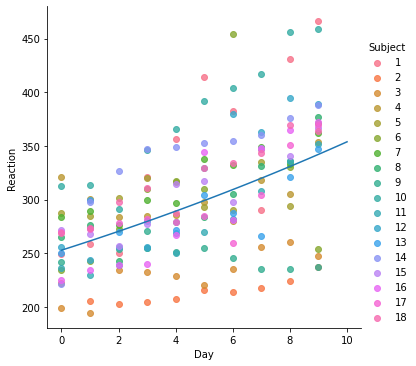

In [55]:
#y_vals1 = np.exp(np.mean(fit1_df['beta.1'])) + np.exp(np.mean(fit1_df['beta.2'])) * (x_vals)
sns.lmplot(x = 'Day', y = 'Reaction', data=df_long, hue = 'Subject', fit_reg = False);
plt.plot(x_vals, y_vals1, '-');

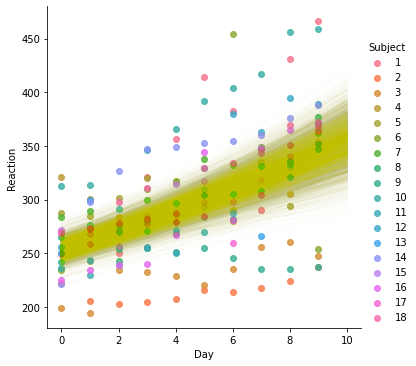

In [56]:
sns.lmplot(x = 'Day', y = 'Reaction', data=df_long, hue = 'Subject', fit_reg = False);

for i in range(0, 3999):
    y_vals = np.exp(((np.mean(fit1_df['beta.1'][i]) + np.mean(fit1_df['beta.2'][i]) * x_vals) + np.mean(fit1_df['sigma'][i] ** 2) / 2))
    plt.plot(x_vals, y_vals, '-y', alpha = 0.01)

In [29]:
#Convert pystan fit object to IO for Arviz functions.
# Convert pystan fit object to IO for Arviz functions.
idata1 = az.from_pystan(posterior = fit1, posterior_model = sm1, log_likelihood = ['log_lik'],
                        posterior_predictive=['yrep'],observed_data= 'y')

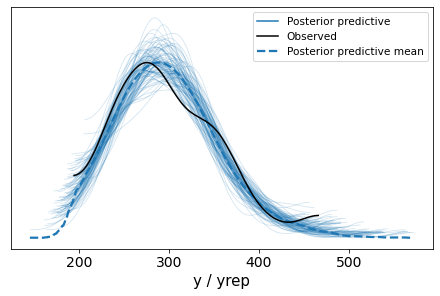

In [30]:
# Plot posterior simulated data sets for posterior predictive check
az.plot_ppc(idata1, data_pairs= {"y" : "yrep"}, num_pp_samples = 100, observed = True);

The posterior predictive check show that lognormal model fit the data better than the normal model

LOO

In [31]:
loo1 = az.loo(idata, pointwise = True)
loo2 = az.loo(idata1, pointwise = True)

/home/users/bu807041/.local/lib/python3.7/site-packages/arviz/stats/stats.py:656: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  "Estimated shape parameter of Pareto distribution is greater than 0.7 for "
/home/users/bu807041/.local/lib/python3.7/site-packages/arviz/stats/stats.py:656: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  "Estimated

In [32]:
print(loo1); print(loo2)

Computed from 4000 by 180 log-likelihood matrix

         Estimate       SE
elpd_loo  -860.33    22.64
p_loo       33.48        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)      173   96.1%
 (0.5, 0.7]   (ok)          5    2.8%
   (0.7, 1]   (bad)         1    0.6%
   (1, Inf)   (very bad)    1    0.6%

Computed from 4000 by 180 log-likelihood matrix

         Estimate       SE
elpd_loo  -847.55    18.95
p_loo       33.48        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)      168   93.3%
 (0.5, 0.7]   (ok)         10    5.6%
   (0.7, 1]   (bad)         1    0.6%
   (1, Inf)   (very bad)    1    0.6%



/home/users/bu807041/.local/lib/python3.7/site-packages/arviz/stats/stats.py:146: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  "The default method used to estimate the weights for each model,"
/home/users/bu807041/.local/lib/python3.7/site-packages/arviz/stats/stats.py:656: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  "Estimated shape parameter of Pareto distribution is greater than 0.7 for "
/home/users/bu807041/.local/lib/python3.7/site-packages/arviz/stats/stats.py:656: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You shoul

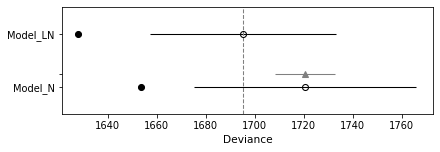

In [33]:
compare_dict = {"Model_N": idata, "Model_LN": idata1}
model_compare = az.compare(compare_dict, scale = 'deviance');
az.plot_compare(model_compare);

On the deviance scale the lognormal model according to loo is the model with the better out of sample prediction score in terms of a point estimate. However, the models performances are not to dissimilar with the overlap in the error intervals and as such the normal mixed model for prediction is not to be dismissed. Above all replication of the study and asking specific predictive questions is the most effective way to test these statistical models in terms of the data generating process (Briggs, 2016). 

The last point to bring up is the warnings above are suggesting a more robust model might be approprtriate to handle the levaraging points in the sample to get a better approximation with the importance sampling algorithms. However, that is left to the ambitious reader.  

# References 

Bates, D., Mächler, M., Bolker, B., & Walker, S. (2014). Fitting linear mixed-effects models using lme4. arXiv preprint arXiv:1406.5823.

Belenky, G., Wesensten, N. J., Thorne, D. R., Thomas, M. L., Sing, H. C., Redmond, D. P., ... & Balkin, T. J. (2003). Patterns of performance degradation and restoration during sleep restriction and subsequent recovery: A sleep dose‐response study. Journal of sleep research, 12(1), 1-12.


Lachaud, C. M., & Renaud, O. (2011). A tutorial for analyzing human reaction times: How to filter data, manage missing values, and choose a statistical model. Applied Psycholinguistics, 32(2), 389-416.

Singmann, H., & Kellen, D. (2019). An Introduction to Mixed Models for Experimental Psychology. In
D. H. Spieler & E. Schumacher (Eds.), New Methods in Cog.